# Projeto 2

- Checar se o dataset possui valor nulo e tirá-los
- Calcular a média, mediana e moda para a coluna Annual Income
- Calcular a variância, desvio padrão e skewness para para a coluna spending scores
- Detectar outliers na coluna Annual Income e spending score usando o z-score

### Checar se o dataset possui valor nulo e tirá-los

In [2]:
import pandas as pd

df = pd.read_csv('dataset/customer_income_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    int64  
 1   CustomerGender  200 non-null    object 
 2   CustomerAge     200 non-null    int64  
 3   CustomerCity    200 non-null    object 
 4   AnnualIncome    200 non-null    float64
 5   CreditScore     200 non-null    int64  
 6   SpendingScore   200 non-null    int64  
 7   CustomerCityID  200 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [5]:
# Percebe-se que não há valores nulos
# Porém, caso tivesse, era só executar o comando abaixo:

df.dropna(inplace=True)

### Calcular a média, mediana e moda para a coluna Annual Income

In [11]:
print(f"Média: {df['AnnualIncome'].mean()}")
print(f"Mediana: {df['AnnualIncome'].median()}")
print(f"Moda: {df['AnnualIncome'].mode()[0]}")

Média: 285143.93164644
Mediana: 263418.50555
Moda: 2577.057456


### Calcular a variância, desvio padrão e skewness para para a coluna spending scores

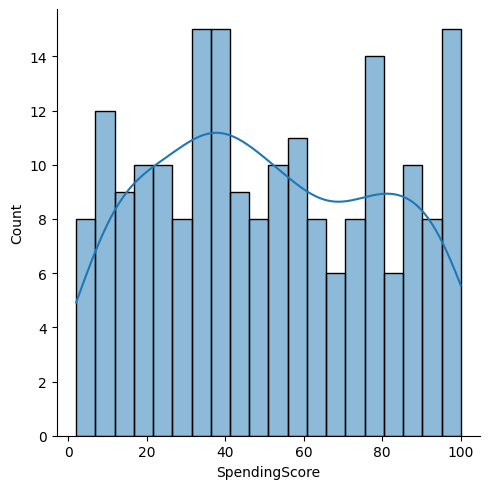

In [17]:
import seaborn as sns

sns.displot(df['SpendingScore'], bins=20, kde=True);

In [13]:
from scipy.stats import skew

print(f"Média: {df['SpendingScore'].var()}")
print(f"Mediana: {df['SpendingScore'].std()}")
print(f"Skewness: {skew(df['SpendingScore'])}")

Média: 824.9929396984925
Mediana: 28.722690328353515
Skewness: 0.10081837365183154


### Detectar outliers na coluna Annual Income e spending score usando o z-score

In [21]:
from scipy.stats import zscore
import numpy as np
z_points = np.abs(zscore(df[['AnnualIncome', 'SpendingScore']]))
z_points

,AnnualIncome,SpendingScore
0,1.435993,0.952679
1,0.462074,0.429133
2,0.715143,0.638551
3,1.356137,0.722668
4,0.171497,1.560341
...,...,...
195,0.191478,0.045199
196,0.226068,0.254618
197,1.043125,0.513249
198,0.740657,0.932086


In [28]:
threshold = 2 # desvios padrão
outliers = (z_points > threshold)
outliers

,AnnualIncome,SpendingScore
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [32]:
# outliers para annual income
valores_outliers_annual = df['AnnualIncome'][outliers["AnnualIncome"]]
valores_outliers_annual.index

Int64Index([62, 65, 114, 148, 155, 166, 171, 177, 194], dtype='int64')

In [34]:
# outliers para spending score
valores_outliers_spending = df['SpendingScore'][outliers["SpendingScore"]]
valores_outliers_spending.index

Int64Index([], dtype='int64')

- Nota-se que para a coluna Annual income temos 9 outliers e para a coluna Spending score temos 0 outliers